# DATA ANAlYSIS: Credit Card Lead Prediction

##Problem Statement
Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.



The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 



In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

* Customer details (gender, age, region etc.)
* Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

## About Dataset

Here we have 245725 rows and 11 columns in train.csv file and in test.csv file we have 10000 row and 10 columns except "Is_Lead" which we need to predict.

* **ID:**=> Unique Identifier for a row
* **Gender:**=> Gender of the Customer
* **Age:**=> Age of the Customer (in Years)
* **Region_Code:**=> Code of the Region for the customers
* **Occupation:**=> Occupation Type for the customer
* **Channel_Code:**=> Acquisition Channel Code for the Customer  (Encoded)
* **Vintage:**=> Vintage for the Customer (In Months)
* **Credit_Product:**=> If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)
* **Avg_Account_Balance:**=> Average Account Balance for the Customer in last 12 Months
* **Is_Active:**=> If the Customer is Active in last 3 Months
* **Is_Lead(Target):**=> If the Customer is interested for the Credit Card
    * 0 : Customer is not interested
    * 1 : Customer is interested 

### 1. Importing important libraries

In [2]:
# Import some important libraries which will help use to work on the problem
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### 2. Loading Data

In [4]:
# Simply to read the data from csv file.
data = pd.read_csv("train.csv")

### 3. Basic Analysis

In [167]:
# To show first 5 rows of dataframe as a head rows
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [7]:
# To check the shape of the dataframe we have
print("Shape of data is: ",data.shape)
print("Number of rows we have: ",data.shape[0])
print("Number of columns we have: ",data.shape[1])

Shape of data is:  (245725, 11)
Number of rows we have:  245725
Number of columns we have:  11


#### Check for duplicates
If we have then drop them because they do not help us.

In [168]:
# Subset is the list on which you want to find duplicates.
duplicate = data[data.duplicated(subset=['Gender','Age','Region_Code','Occupation', 'Channel_Code','Vintage','Credit_Product','Avg_Account_Balance','Is_Active','Is_Lead'],keep="first")]
print("Number of Duplicates we have in our data: ",duplicate.shape)
# Lets drop duplicates
data.drop_duplicates(subset=['Gender','Age','Region_Code','Occupation', 'Channel_Code','Vintage','Credit_Product','Avg_Account_Balance','Is_Active','Is_Lead'],keep="first",inplace=True)
# After droping duplicates new shape of our data is 
data.shape

Number of Duplicates we have in our data:  (21, 11)


(245704, 11)

In [9]:
# To check some basic information like data type of each column and non null values in all columns and memory it takes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245704 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245704 non-null  object
 1   Gender               245704 non-null  object
 2   Age                  245704 non-null  int64 
 3   Region_Code          245704 non-null  object
 4   Occupation           245704 non-null  object
 5   Channel_Code         245704 non-null  object
 6   Vintage              245704 non-null  int64 
 7   Credit_Product       216379 non-null  object
 8   Avg_Account_Balance  245704 non-null  int64 
 9   Is_Active            245704 non-null  object
 10  Is_Lead              245704 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 22.5+ MB


**Observations**
* We see clearly in the Credit_Product column we have some NULL/missing values.
* Lets work on it first because these missing values may impact our analysis.

As we observe Credit_Product is a categorical feature.
### How to deal with missing values in categorical features
We have various techniques to deal with the missing values some of them are given below.
1. Drop the rows which have missing values.
2. Drop the columns which contains missing values.
3. Replace missing values with most frequest ones.
4. Make a model to predict missing values.
5. Use clustering to fill missing values.
6. Make a new category for missing values.

### Exploratory Data Analysis
#### Feature wise analysis

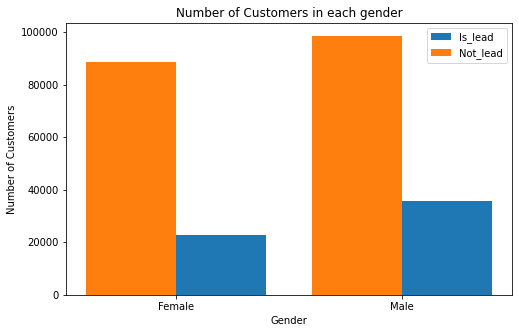

In [42]:
# Setting figure size
plt.figure(figsize=(8,5))

# Make a group of Gender based on the Is_Lead column
x = data.groupby(["Gender"])["Is_Lead"].value_counts()

# Make a list to give x-axis name
name = ['Female','Male']

# Getting values from x which contain value count for each category 
notlead = [x[0],x[2]]
islead = [x[1],x[3]]

# get length of name array and set it to the x axis
x_axis = np.arange(len(name))

# Plot bars
plt.bar(x_axis + 0.2, islead, 0.4, label = 'Is_lead')
plt.bar(x_axis - 0.2, notlead, 0.4, label = 'Not_lead')

# Setting name to x axis
plt.xticks(x_axis, name)

# Set x-axis label
plt.xlabel("Gender")

# Set y-axis label
plt.ylabel("Number of Customers")

# set title
plt.title("Number of Customers in each gender")

# TO set legend on the plot for better understandings
plt.legend()

# Finally show the plot
plt.show()

**Observations**
* Male Cantidates are more intent to get credit card offer than females but this difference is low.

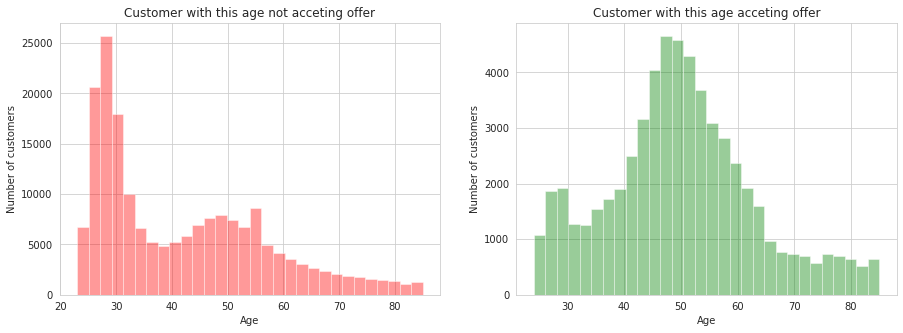

In [48]:
plt.figure(figsize=(15,5))
# Here we are selection age based on the age
yes = data[data["Is_Lead"]==1]["Age"]
no = data[data["Is_Lead"]==0]["Age"]
plt.subplot(121)
sb.distplot(no, kde = False, color ='red', bins = 30)
plt.title("Customer with this age not acceting offer")
plt.ylabel("Number of customers")
plt.subplot(122)
sb.distplot(yes, kde = False, color ='green', bins = 30)
plt.title("Customer with this age acceting offer")
plt.ylabel("Number of customers")
plt.show()

**Observations**
* As we can see People more number of people between age 23 and 35 are not accepting offers.
* On the other side people age between 35 and 65 are accepting more offers than others.
* But if we observe number of offers accepts and regected in the age between 35 and 65 are approx same so this feature may not give any useful results. we can drop it.

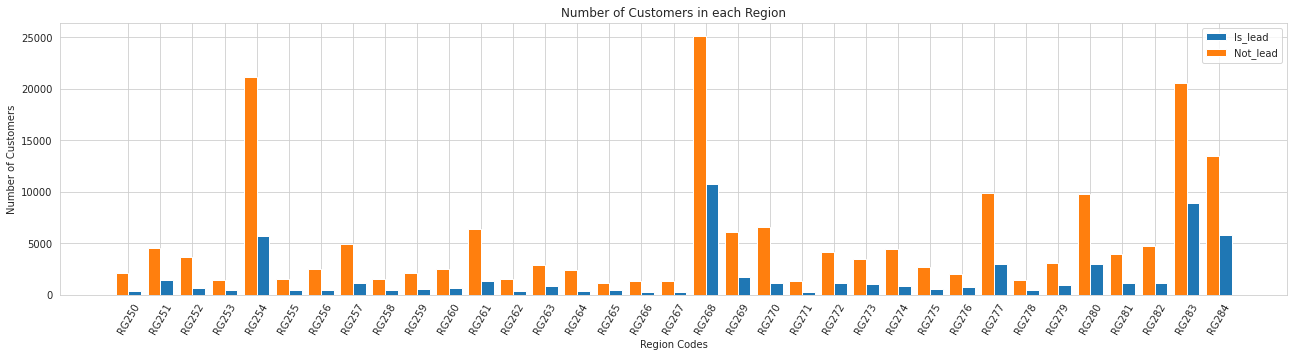

In [71]:
plt.figure(figsize=(22,5))
x = data.groupby(["Region_Code"])["Is_Lead"].value_counts()
region_codes = np.unique(data["Region_Code"])
yes=[]
no=[]
for i in range(0,len(x),2):
    yes.append(x[i+1])
    no.append(x[i])
x_axis = np.arange(len(region_codes)) 
plt.bar(x_axis + 0.2, yes, 0.4, label = 'Is_lead')
plt.bar(x_axis - 0.2, no, 0.4, label = 'Not_lead')
plt.xticks(x_axis, region_codes)
plt.xticks(rotation=60)
plt.xlabel("Region Codes")
plt.ylabel("Number of Customers")
plt.title("Number of Customers in each Region")
plt.legend()
plt.show()

**Observations**
* As we can clearly se that we have more Leads/offer acceptance with only 4 regions ["RG254","RG268","RG277","RG283","RG284"].
* so we can conside only these features and we can drop all of them.


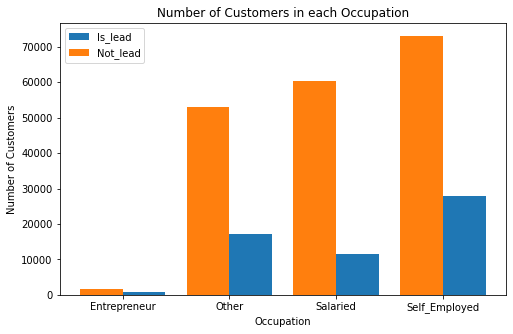

In [26]:
plt.figure(figsize=(8,5))
x = data.groupby(["Occupation"])["Is_Lead"].value_counts()
name = ['Entrepreneur','Other','Salaried','Self_Employed']
notlead = [x[0],x[2],x[4],x[6]]
islead = [x[1],x[3],x[5],x[7]]
x_axis = np.arange(len(name))
plt.bar(x_axis + 0.2, islead, 0.4, label = 'Is_lead')
plt.bar(x_axis - 0.2, notlead, 0.4, label = 'Not_lead')
plt.xticks(x_axis, name)
plt.xlabel("Occupation")
plt.ylabel("Number of Customers")
plt.title("Number of Customers in each Occupation")
plt.legend()
plt.show()

**Observations**
* We can clearly see people with occupation are actually less and tendency is 50% to accept any offer

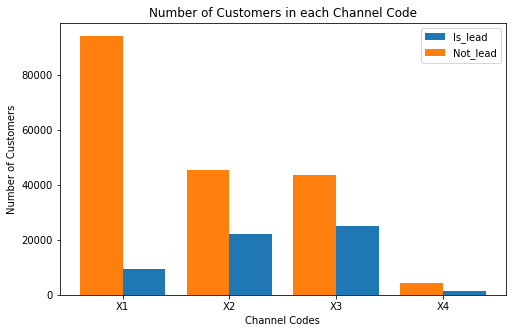

In [20]:
plt.figure(figsize=(8,5))
x = data.groupby(["Channel_Code"])["Is_Lead"].value_counts()
name = ['X1','X2','X3','X4']
notlead = [x[0],x[2],x[4],x[6]]
islead = [x[1],x[3],x[5],x[7]]
x_axis = np.arange(len(name)) 
plt.bar(x_axis + 0.2, islead, 0.4, label = 'Is_lead')
plt.bar(x_axis - 0.2, notlead, 0.4, label = 'Not_lead')
plt.xticks(x_axis, name)
plt.xlabel("Channel Codes")
plt.ylabel("Number of Customers")
plt.title("Number of Customers in each Channel Code")
plt.legend()
plt.show()

**Observations**
* Mostly acceptance are from channel code X2 and X3. and here ratio is also very good in comparison to others.
* In this case we can drop x1 and x4 in our model so did not effect much

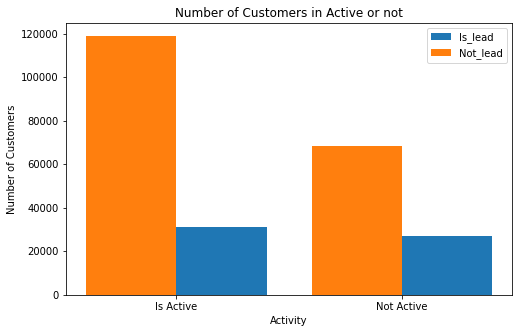

In [22]:
plt.figure(figsize=(8,5))
x = data.groupby(["Is_Active"])["Is_Lead"].value_counts()
name = ['Is Active','Not Active']
notlead = [x[0],x[2]]
islead = [x[1],x[3]]
x_axis = np.arange(len(name)) 
plt.bar(x_axis + 0.2, islead, 0.4, label = 'Is_lead')
plt.bar(x_axis - 0.2, notlead, 0.4, label = 'Not_lead')
plt.xticks(x_axis, name)
plt.xlabel("Activity")
plt.ylabel("Number of Customers")
plt.title("Number of Customers in Active or not")
plt.legend()
plt.show()

**Observations**
* Number of counts of acceptance are approx equal on both cases but rejections are more were account is active. 

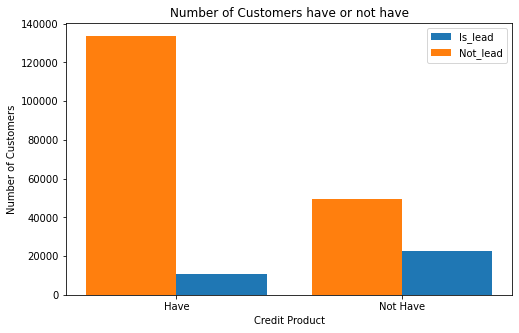

In [27]:
plt.figure(figsize=(8,5))
x = data.groupby(["Credit_Product"])["Is_Lead"].value_counts()
name = ['Have','Not Have']
notlead = [x[0],x[2]]
islead = [x[1],x[3]]
x_axis = np.arange(len(name)) 
plt.bar(x_axis + 0.2, islead, 0.4, label = 'Is_lead')
plt.bar(x_axis - 0.2, notlead, 0.4, label = 'Not_lead')
plt.xticks(x_axis, name)
plt.xlabel("Credit Product")
plt.ylabel("Number of Customers")
plt.title("Number of Customers have or not have")
plt.legend()
plt.show()

**Observation**
* Due to dissimilarity in dataset and also lead and not lead this feature will works well to identify Is_Lead or not.

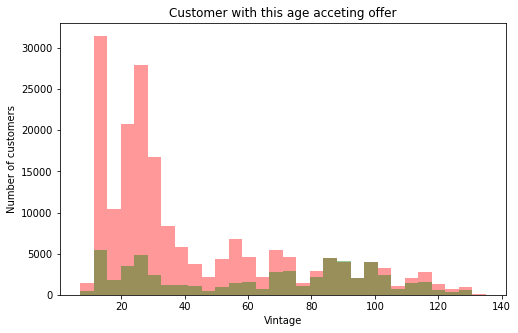

In [37]:
plt.figure(figsize=(8,5))
yes = data[data["Is_Lead"]==1]["Vintage"]
no = data[data["Is_Lead"]==0]["Vintage"]
sb.distplot(no, kde = False, color ='red', bins = 30)
# plt.title("Customer with this age not acceting offer")
# plt.ylabel("Number of customers")
# plt.subplot(122)
sb.distplot(yes, kde = False, color ='green', bins = 30)
plt.title("Customer with this age acceting offer")
plt.ylabel("Number of customers")
plt.show()

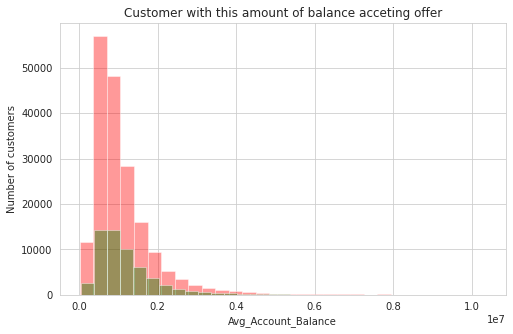

In [106]:
plt.figure(figsize=(8,5))
yes = data[data["Is_Lead"]==1]["Avg_Account_Balance"]
no = data[data["Is_Lead"]==0]["Avg_Account_Balance"]
sb.distplot(no, kde = False, color ='red', bins = 30)
# plt.title("Customer with this age not acceting offer")
# plt.ylabel("Number of customers")
# plt.subplot(122)
sb.distplot(yes, kde = False, color ='green', bins = 30)
plt.title("Customer with this amount of balance acceting offer")
plt.ylabel("Number of customers")
plt.show()

**Observations**
* Low vintage people are more intent to reject the offers.
* This feature is important because it has not any similarity in is lead and not lead rows.

### Complete Understanding 
With this analysis what we have done till now we can say.
* Some important features are
    * Vintage
    * X2 and X3 Channel codes
    * Credit Product
    * Occupation all types 
    * 4 region code that we mentioned earlier.
    * And Avg_Account_Balance

To get more understanding lets apply some feature selection algorithm, here we are going to use Chi Square which tells us more important features.

#### But before apply that we have encode our data because it works only on numerical data. and also take care or null values in credit product.



### Encoding

In [169]:
# This is like onehot encoding 
# Apply one hot encoding based on the occupation 
data = pd.concat([data,pd.get_dummies(data.Occupation)],axis=1)
# Then we have to drop the occupation column from the main data
data.drop(["Occupation"],axis=1,inplace=True)

# Apply one hot encoding based on the region code 
data = pd.concat([data,pd.get_dummies(data.Region_Code)],axis=1)
data.drop(["Region_Code"],axis=1,inplace=True)

data = pd.concat([data,pd.get_dummies(data.Channel_Code)],axis=1)
data.drop(["Channel_Code"],axis=1,inplace=True)


# To encode Is_Active in 0 and 1 with map function 
data["Is_Active"] = data["Is_Active"].map({"No":0,"Yes":1})

# To encode Gender in numerical data 
data["Gender"] = data["Gender"].map({"Female":0,"Male":1})

data = pd.concat([data,pd.get_dummies(data.Credit_Product,prefix='Credit_Product')],axis=1)
data.drop("Credit_Product",inplace=True,axis=1)

In [170]:
# Let set how data look like after applying encoding
data.head()

,ID,Gender,Age,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,Entrepreneur,Other,Salaried,Self_Employed,RG250,RG251,RG252,RG253,RG254,RG255,RG256,RG257,RG258,RG259,RG260,RG261,RG262,RG263,RG264,RG265,RG266,RG267,RG268,RG269,RG270,RG271,RG272,RG273,RG274,RG275,RG276,RG277,RG278,RG279,RG280,RG281,RG282,RG283,RG284,X1,X2,X3,X4,Credit_Product_No,Credit_Product_Yes
0,NNVBBKZB,0,73,43,1045696,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,IDD62UNG,0,30,32,581988,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,HD3DSEMC,0,56,26,1484315,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,BF3NC7KV,1,34,19,470454,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,TEASRWXV,0,30,33,886787,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [171]:
# Now shape of the data is 
data.shape

(245704, 52)

### Feature selection

In [172]:
# To get most important feature we apply Chi square test on it.
y = data["Is_Lead"]
data.drop(["ID","Is_Lead"],axis=1,inplace=True)
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(data,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(20,'Score'))

                  Specs         Score
3   Avg_Account_Balance  4.512177e+08
2               Vintage  4.282205e+05
1                   Age  6.561412e+04
48    Credit_Product_No  2.135820e+04
44                   X1  1.218153e+04
46                   X3  6.398139e+03
45                   X2  3.077549e+03
5          Entrepreneur  2.642671e+03
49   Credit_Product_Yes  2.406220e+03
7              Salaried  2.390967e+03
4             Is_Active  1.104020e+03
8         Self_Employed  8.370213e+02
27                RG268  7.780417e+02
42                RG283  6.829880e+02
0                Gender  5.792316e+02
43                RG284  4.348780e+02
29                RG270  3.678375e+02
11                RG252  2.326359e+02
20                RG261  2.021173e+02
23                RG264  1.544528e+02


**Observations**
* These are most important top 20 features

# Thank You